<a href="https://colab.research.google.com/github/hrbolek/learning/blob/master/operanalyst/linearprog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://math.feld.cvut.cz/bohata/oth/p6.pdf
http://labe.felk.cvut.cz/~tkrajnik/sdu/slides/slides9.pdf

# Lineární programování

$max\{c^Tx:Ax\le b\}$

## Kanonický tvar úlohy lineárního programování

$max\{c^Tx:Ax = b, x \le 0\}$

## Převedení úlohy lineárního programování na kanonický tvar

### Úloha na minimum na úlohu na maximum

$max\{c^Tx:Ax\le b\}$

$min\{-c^Tx:Ax\le b\}$

### Úloha s nerovnostmi na úlohu s rovnostmi

#### Příklad

$$f(x)=x_1+3x_2 \to max$$
$$-2x_1+x_2\le 5$$
$$-3x_1+x_2=7$$
$$x_1\ge 0, x_2\ge 0$$

#### Řešení
$$f(x)=x_1+3x_2 \to max$$
$$-2x_1+x_2+x_3= 5$$
$$-3x_1+x_2=7$$
$$x_1\ge 0, x_2\ge 0, x_3\ge 0$$

## Příklady

### Příklad 1

Surový materiál je dodáván v délce 7 m. Požadavek je produkovat délky 2.3 m (A), 1.9 m (B) a 0.8 m (C) v počtech A 60 ks, B 90 ks a C 320 ks. Stanovte minimální počet kusů surového materiálu.

In [ ]:
delkaZdroje = 7
delkyVysledku = (2.3, 1.9, 0.8) 
poctyVysledku = (60, 90, 320)

In [ ]:
def cutIt(source, results):
  '''
  Pocita mozne rozrezani materialu, 
  zdrojovy material je source, results cilove delky
  '''
  
  noyield = True # zadny vysledek nebyl vygenerovan
  for current in results:
    
    if current <= source: # rez lze provest jen tehdy, pokud je surovina delsi nez vysledek
      
      # zjistime mozne rezy ze zbytku
      for cutting in cutIt(source - current, results):
        if len(cutting) == 0:
          # rez je "nerez", vracena prazdna konfigurace
          noyield = False
          yield [current] # vysledna konfigurace rezu tedy obsahuje jen jeden prvek
          continue
        if current >= max(cutting):
          # vraceny cutting je serazen podle velikost, tedy zastupuje vsechny ekvivalentni kombinace 
          noyield = False
          yield [current, *cutting]
  if noyield:
    # zadna konfigurace rezu nebyla vracena, musime vratit prazdnou konfiguraci
    yield []

for index, possibleCut in enumerate(cutIt(delkaZdroje, delkyVysledku)):
  print(index, '.\tcut:', possibleCut, '\tΣ', sum(possibleCut))

0 .	cut: [2.3, 2.3, 2.3] 	Σ 6.8999999999999995
1 .	cut: [2.3, 2.3, 1.9] 	Σ 6.5
2 .	cut: [2.3, 2.3, 0.8, 0.8, 0.8] 	Σ 6.999999999999999
3 .	cut: [2.3, 1.9, 1.9, 0.8] 	Σ 6.8999999999999995
4 .	cut: [2.3, 1.9, 0.8, 0.8, 0.8] 	Σ 6.599999999999999
5 .	cut: [2.3, 0.8, 0.8, 0.8, 0.8, 0.8] 	Σ 6.299999999999999
6 .	cut: [1.9, 1.9, 1.9, 0.8] 	Σ 6.499999999999999
7 .	cut: [1.9, 1.9, 0.8, 0.8, 0.8] 	Σ 6.199999999999999
8 .	cut: [1.9, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8] 	Σ 6.699999999999999
9 .	cut: [0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8] 	Σ 6.3999999999999995


In [ ]:
def countIt(configuration, results):
  result = {}
  for item in results:
    result[item] = 0
  for item in configuration:
    result[item] += 1
  return result

def countAll(configurations, results):
  for configuration in configurations:
    yield countIt(configuration, results)

variants = list(countAll(cutIt(delkaZdroje, delkyVysledku), delkyVysledku))

for index, possibleCut in enumerate(variants):
  print(index, '.\tcut:', possibleCut, '\tΣ', sum(map(lambda x: x[0] * x[1], possibleCut.items())))

0 .	cut: {2.3: 3, 1.9: 0, 0.8: 0} 	Σ 6.8999999999999995
1 .	cut: {2.3: 2, 1.9: 1, 0.8: 0} 	Σ 6.5
2 .	cut: {2.3: 2, 1.9: 0, 0.8: 3} 	Σ 7.0
3 .	cut: {2.3: 1, 1.9: 2, 0.8: 1} 	Σ 6.8999999999999995
4 .	cut: {2.3: 1, 1.9: 1, 0.8: 3} 	Σ 6.6
5 .	cut: {2.3: 1, 1.9: 0, 0.8: 5} 	Σ 6.3
6 .	cut: {2.3: 0, 1.9: 3, 0.8: 1} 	Σ 6.499999999999999
7 .	cut: {2.3: 0, 1.9: 2, 0.8: 3} 	Σ 6.2
8 .	cut: {2.3: 0, 1.9: 1, 0.8: 6} 	Σ 6.700000000000001
9 .	cut: {2.3: 0, 1.9: 0, 0.8: 8} 	Σ 6.4


In [ ]:
for result, count in zip(delkyVysledku, poctyVysledku):
  for index, variant in enumerate(variants):
    if (variant[result] == 0):
      print('\t\t', end='')
    else:
      print('\t + ', variant[result], ' * x', index, sep='', end='')
  print('\t >=', count)
  
for index, variant in enumerate(variants):
  print(' + x', index, sep='', end='')
print(' -> min')


	 + 3 * x0	 + 2 * x1	 + 2 * x2	 + 1 * x3	 + 1 * x4	 + 1 * x5									 >= 60
			 + 1 * x1			 + 2 * x3	 + 1 * x4			 + 3 * x6	 + 2 * x7	 + 1 * x8			 >= 90
					 + 3 * x2	 + 1 * x3	 + 3 * x4	 + 5 * x5	 + 1 * x6	 + 3 * x7	 + 6 * x8	 + 8 * x9	 >= 320
 + x0 + x1 + x2 + x3 + x4 + x5 + x6 + x7 + x8 + x9 -> min


In [ ]:
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.linprog.html
from scipy.optimize import linprog
c = [1] * len(variants)
bounds=[(0, None)] * len(variants)
Ax = [0] * len(variants)
A = [[*Ax] for item in delkyVysledku]
print(A)
for i, result, count in zip(range(1000), delkyVysledku, poctyVysledku):
  for j, variant in enumerate(variants):
    A[i][j] = -variant[result]

b = [-value for value in delkyVysledku]

print(A)
print(b)
print(c)
print(bounds)
res = linprog(c, A_ub=A, b_ub=b, bounds=bounds, method='revised simplex')
print(res)

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]
[[-3, -2, -2, -1, -1, -1, 0, 0, 0, 0], [0, -1, 0, -2, -1, 0, -3, -2, -1, 0], [0, 0, -3, -1, -3, -5, -1, -3, -6, -8]]
[-2.3, -1.9, -0.8]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[(None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None)]
     con: array([], dtype=float64)
     fun: 1.26875
 message: 'The problem is unbounded, as the simplex algorithm found a basic feasible solution from which there is a direction with negative reduced cost in which all decision variables increase.'
     nit: 5
   slack: array([0.00000000e+00, 4.44089210e-16, 2.22044605e-16])
  status: 3
 success: False
       x: array([ 0.     ,  0.     ,  0.     ,  2.3    ,  0.     ,  0.     ,
        0.     , -1.35   ,  0.     ,  0.31875])


In [ ]:
c = [-1, 4, 1]
A = [[-3, 1, 1], [1, 2, 1]]
b = [6, 4]
x0_bounds = (None, None)
x1_bounds = (-3, None)
x2_bounds = (None, None)
from scipy.optimize import linprog
res = linprog(c, A_ub=A, b_ub=b, bounds=[x0_bounds, x1_bounds, x2_bounds], method='revised simplex')
print(res)

     con: array([], dtype=float64)
     fun: -22.0
 message: 'The problem is unbounded, as the simplex algorithm found a basic feasible solution from which there is a direction with negative reduced cost in which all decision variables increase.'
     nit: 1
   slack: array([39.,  0.])
  status: 3
 success: False
       x: array([10., -3.,  0.])


#### Příklad
$$f(x)=3x_1+2x_2 \to max$$
$$2x_1+x_2\le 100$$
$$x_1+x_2\le 80$$
$$x_1 \le 40$$
$$x_1\ge 0, x_2\ge 0$$

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in true_divide
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in true_divide
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  


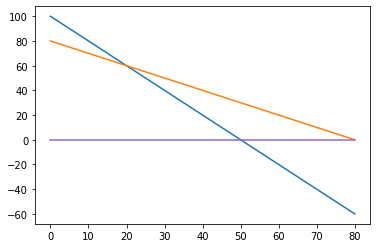

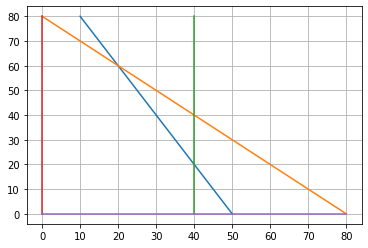

In [12]:
import numpy as np
import matplotlib.pyplot as plt

def createLinearFunc2D(a1, a2, b=0):
  def func(x1):
    result = (a1 * x1 - b) / (-a2)
    return result
  return func

def plot(*f, xmin=0, xmax=10, ymin=0, ymax=10):
  x = np.linspace(xmin, xmax)
  for func in f:
    y = func(x)
    plt.plot(x, y)
  plt.show()

f1 = createLinearFunc2D(2, 1, 100)
f2 = createLinearFunc2D(1, 1, 80)
f3 = createLinearFunc2D(1, 0, 40)
nx1 = createLinearFunc2D(1, 0, 0)
nx2 = createLinearFunc2D(0, 1, 0)

plot(f1, f2, f3, nx1, nx2, xmax=80,ymax=80)
plt.show()

def plotf2D(a1, a2, b, xmin=0, xmax=10, ymin=0, ymax=10):
  # a1 * x1 + a2 * x2 = b
  def byx(x):
    result = (a1 * x - b) / (-a2)
    return result
  def byy(y):
    result = (a2 * y - b) / (-a1)
    return result

  if abs(a1) < abs(a2):
    x = np.linspace(xmin, xmax)
    y = byx(x)
    plt.plot(x, y)
  else:
    y = np.linspace(ymin, ymax)
    x = byy(y)
    plt.plot(x, y)

plotf2D(2, 1, 100, xmax=80,ymax=80)
plotf2D(1, 1, 80, xmax=80,ymax=80)
plotf2D(1, 0, 40, xmax=80,ymax=80)
plotf2D(1, 0, 0, xmax=80,ymax=80)
plotf2D(0, 1, 0, xmax=80,ymax=80)
plt.grid(which='both')
#plt.gca()
plt.show()    